## Group No

## Group Member Names:
1. Anurag Kochar 2021mt12184
2. Ashwin Jayaprakash

We can follow below steps when tackling any ml problem

# 1. Business Understanding
 
Students are expected to identify a classification problem of your choice. You have to detail the Business Understanding part of your problem under this heading which basically addresses the following questions.
 
   1. What is the problem that you are trying to solve?
   2. What data do you need to answer the above problem?


# 2. Data Acquisition
 
For the problem identified by you, students have to find the data source themselves from any data source.

## 2.1 Download the data directly



In [47]:
##---------Type the code below this line------------------##
try:
    !kaggle datasets download -d rupakroy/online-payments-fraud-detection-dataset
except Exception as e:
    print("The notebook needs to be run in a kaggle environment")
    print(e)

Traceback (most recent call last):
  File "/opt/conda/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/opt/conda/lib/python3.7/site-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/opt/conda/lib/python3.7/site-packages/kaggle/api/kaggle_api_extended.py", line 166, in authenticate
    self.config_file, self.config_dir))
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [48]:
!ls

__notebook_source__.ipynb


## 2.2 Code for converting the above downloaded data into a dataframe

In [49]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras import Sequential

In [50]:
##---------Type the code below this line------------------##
data = pd.read_csv('../input/online-payments-fraud-detection-dataset/PS_20174392719_1491204439457_log.csv')


## 2.3 Confirm the data has been correctly by displaying the first 5 and last 5 records.

In [51]:
##---------Type the code below this line------------------##

data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [52]:
data.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


## 2.4 Display the column headings, statistical information, description and statistical summary of the data.

In [53]:
##---------Type the code below this line------------------##
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [54]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [55]:
# finding the number of null entries
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

## 2.5 Write your observations from the above. 
1. Size of the dataset
2. What type of data attributes are there?
3. Is there any null data that has to be cleaned?


# 3. Data Preparation

## 3.1 Display how many unique values are present in each attribute


In [56]:
##---------Type the code below this line------------------##
for i, column in enumerate(data.columns):
    print(data[column].unique)

<bound method Series.unique of 0            1
1            1
2            1
3            1
4            1
          ... 
6362615    743
6362616    743
6362617    743
6362618    743
6362619    743
Name: step, Length: 6362620, dtype: int64>
<bound method Series.unique of 0           PAYMENT
1           PAYMENT
2          TRANSFER
3          CASH_OUT
4           PAYMENT
             ...   
6362615    CASH_OUT
6362616    TRANSFER
6362617    CASH_OUT
6362618    TRANSFER
6362619    CASH_OUT
Name: type, Length: 6362620, dtype: object>
<bound method Series.unique of 0             9839.64
1             1864.28
2              181.00
3              181.00
4            11668.14
              ...    
6362615     339682.13
6362616    6311409.28
6362617    6311409.28
6362618     850002.52
6362619     850002.52
Name: amount, Length: 6362620, dtype: float64>
<bound method Series.unique of 0          C1231006815
1          C1666544295
2          C1305486145
3           C840083671
4          C2048537720


to put it clearly

In [57]:
obj_cols = data.select_dtypes(include='object').columns
obj_cols

Index(['type', 'nameOrig', 'nameDest'], dtype='object')

In [58]:
for i in obj_cols:
    print(f'Number of unique values in {i} : {data[i].nunique()}')
    print(f'Unique Value {i}\n:{data[i].unique()}\n')
    print(data[i].value_counts())
    print('----------------------------------------------')

Number of unique values in type : 5
Unique Value type
:['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64
----------------------------------------------
Number of unique values in nameOrig : 6353307
Unique Value nameOrig
:['C1231006815' 'C1666544295' 'C1305486145' ... 'C1162922333' 'C1685995037'
 'C1280323807']

C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
              ..
C98968405      1
C720209255     1
C1567523029    1
C644777639     1
C1280323807    1
Name: nameOrig, Length: 6353307, dtype: int64
----------------------------------------------
Number of unique values in nameDest : 2722362
Unique Value nameDest
:['M1979787155' 'M2044282225' 'C553264065' ... 'C1850423904' 'C1881841831'
 'C2080388513']

C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
              ... 
M1470

## 3.2 Check for the presence of duplicate data, identify the attributes with duplicate data, report the attributes. Mention the method adopted to remove duplicate data if present. Report the results again.

In [59]:
##---------Type the code below this line------------------##
data.duplicated().any()

False

no duplicates

### method to drop duplicates:


drop_duplicates (self [, subset, keep, inplace]) - Return DataFrame with duplicate rows removed, optionally only considering certain columns.

## 3.3 Show whether there are any missing values in each attribute. Report the same.


In [60]:
##---------Type the code below this line------------------##
# ----------------------------------------------------------------------
def missing_percentage(dataframe):
    """
    This function return take data frame and return data frame 
    with columns name, the number of missing values and the percentage 
    of them in each column.
    """
    total_missing = dataframe.isnull().sum().sort_values(ascending=False)
    missing_values = total_missing[total_missing.values !=0]
    missing_cols = missing_values.index
    
    missing_cols = dataframe[missing_cols].dtypes.values

    per = round((missing_values/len(dataframe))*100, 2)
    missing_df = pd.DataFrame(missing_values, columns=['Number of missing values'])
    
    return missing_df.assign(Percentage=per, Dtype=missing_cols)
#-----------------------------------------------------------------------------

In [61]:
missing_percentage(data)

,Number of missing values,Percentage,Dtype


no missing values

## 3.4 Clean the missing data using any imputation technique, mention the method used and again report the change after cleaning the data.

In [62]:
##---------Type the code below this line------------------##

# no missing values

## 3.5 Check if all the attributes are following the same format and are consistent. If not, report all such attributes and what inconsistencies are present.

In [63]:
def generate_colors(num):
    colors = []
    lst = list('ABCDEF0123456789')

    for i in range(num):
        colors.append('#'+''.join(np.random.choice(lst, 6)))
        
    return colors

#-----------------------------------------------------------------------------
def show_distribution(dataframe, col):
    fig, ax = plt.subplots(1, 2, figsize=(20,8))
    colors = generate_colors(1)
    
    sns.boxplot(data=dataframe, x=col, ax=ax[0], palette=colors)
    ax[0].set_title(f'{col.title()} Boxplot')
    
    sns.histplot(data=dataframe, x=col, ax=ax[1], color=colors, kde=True)
    ax[1].set_title(f'{col.title()} Histogram')
    
    fig.suptitle(f'{col.title()} Distribution'.replace('_', ' '), fontsize=15, color='brown')
#-----------------------------------------------------------------------------------
def show_outliers_accordingTo_target(data_frame, numeric_cols, target_col):
    plt.figure(figsize=(20, 15))
    for i in range(len(numeric_cols)):
        plt.subplot(8,4, i+1)
        sns.scatterplot(data=data_frame, x=numeric_cols[i], y=target_col, color=generate_colors(1))
        plt.title(f'{numeric_cols[i].title()} According to the Target')
        plt.subplots_adjust(hspace=0.9, wspace=0.4)


In [64]:
##---------Type the code below this line------------------##

#show_distribution(data, 'amount')

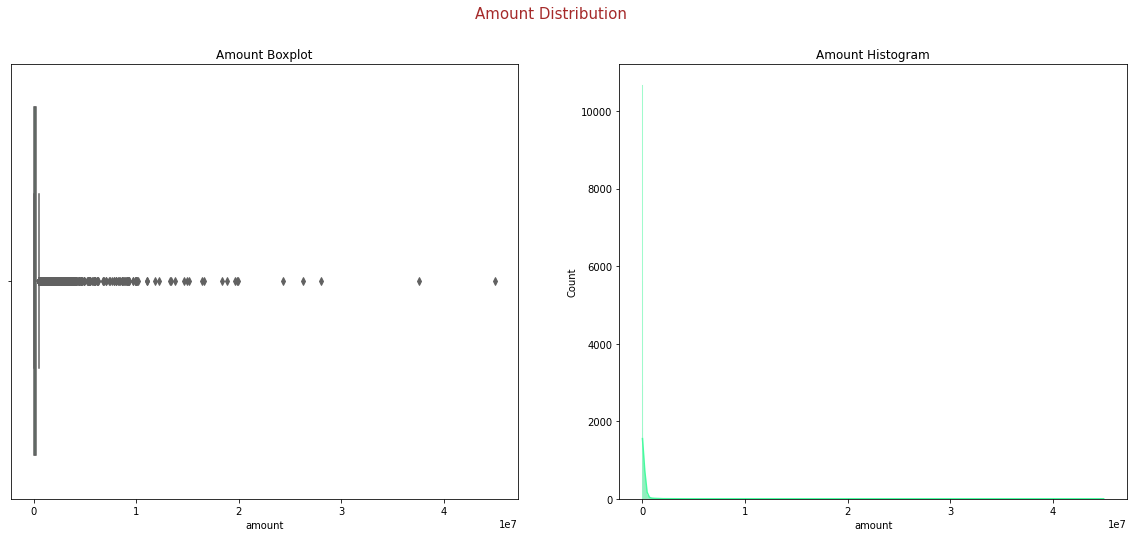

In [65]:
show_distribution(data.sample(50000), 'amount')

## 3.6 Correct the data if there are inconsistencies from 3.5. Report or print the data after correction.

In [66]:
##---------Type the code below this line------------------##
#no inconsistencies

In [67]:
num_cols = data.select_dtypes(exclude='object').columns
num_cols

Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'isFlaggedFraud'],
      dtype='object')

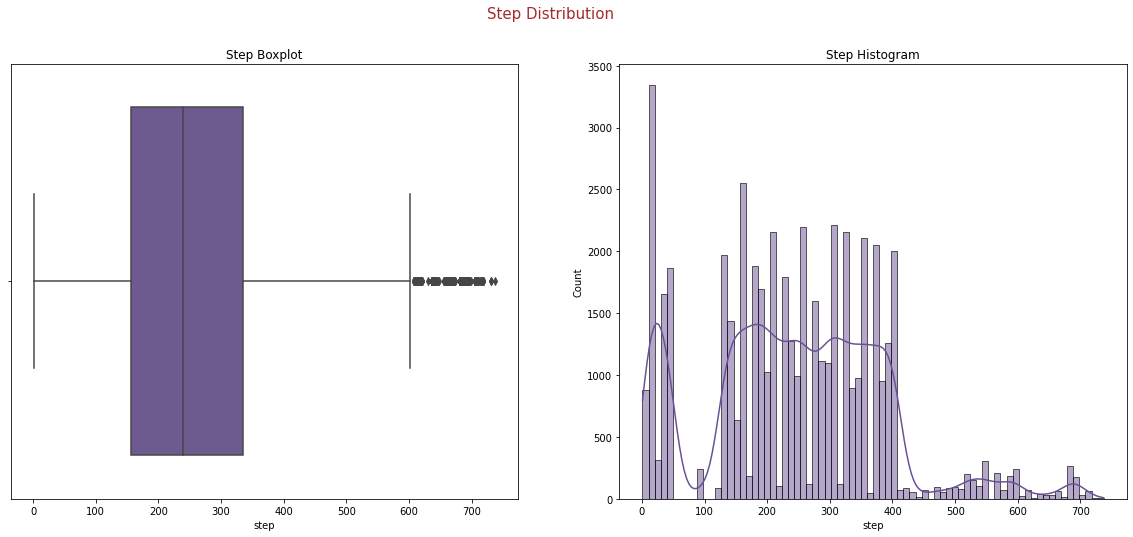

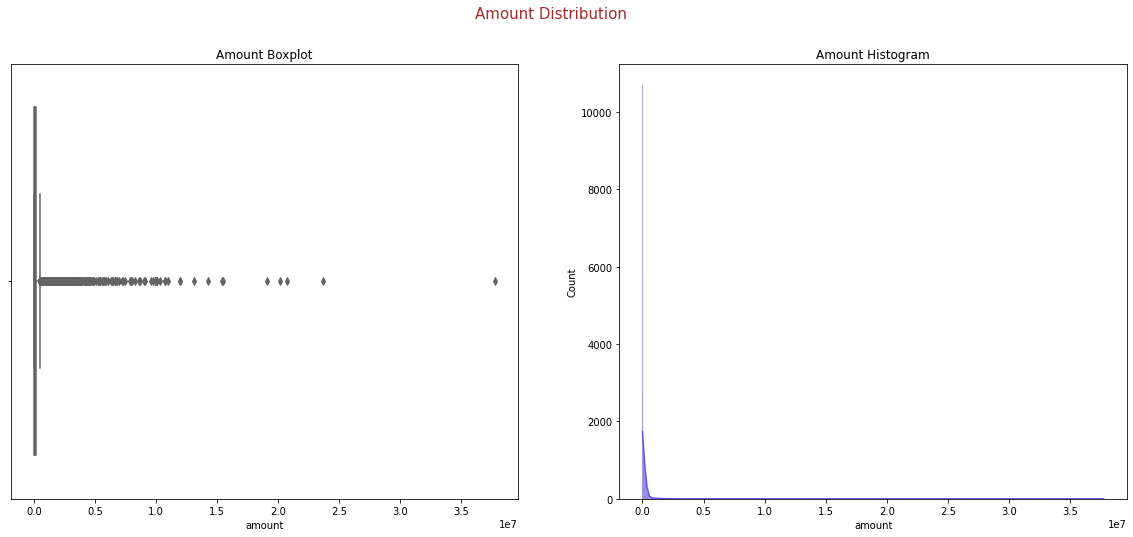

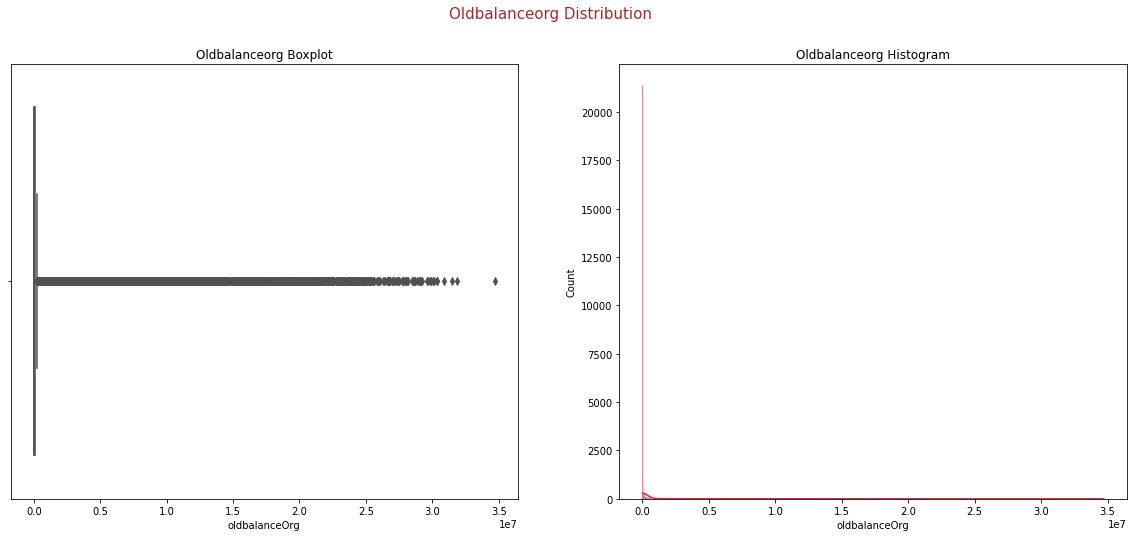

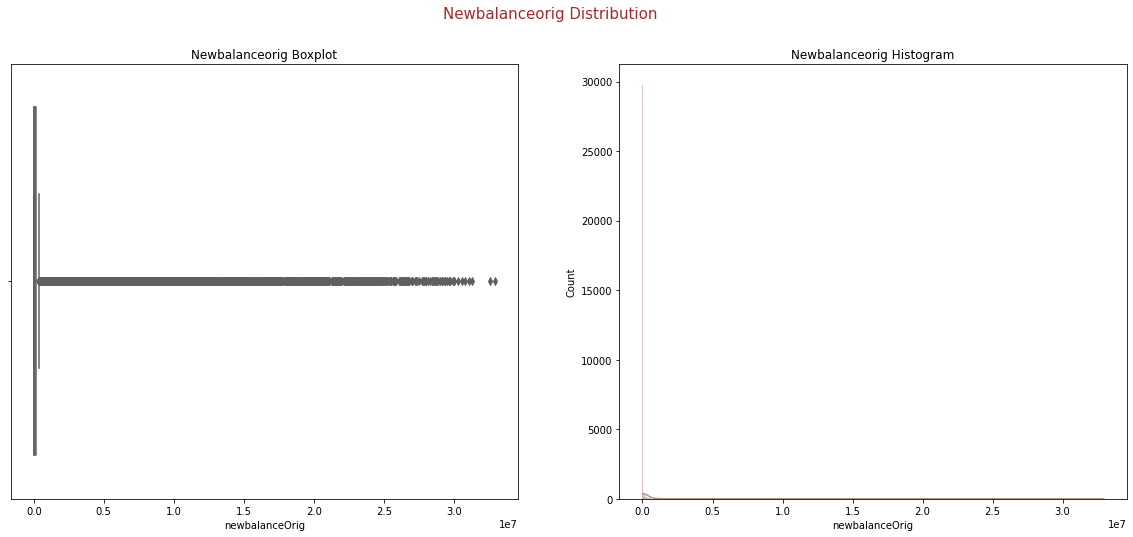

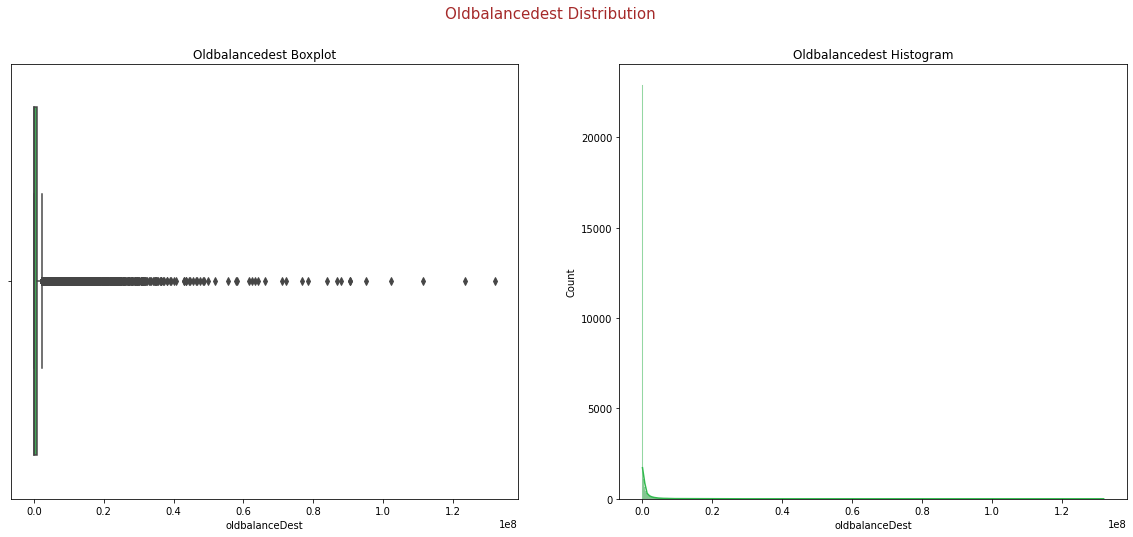

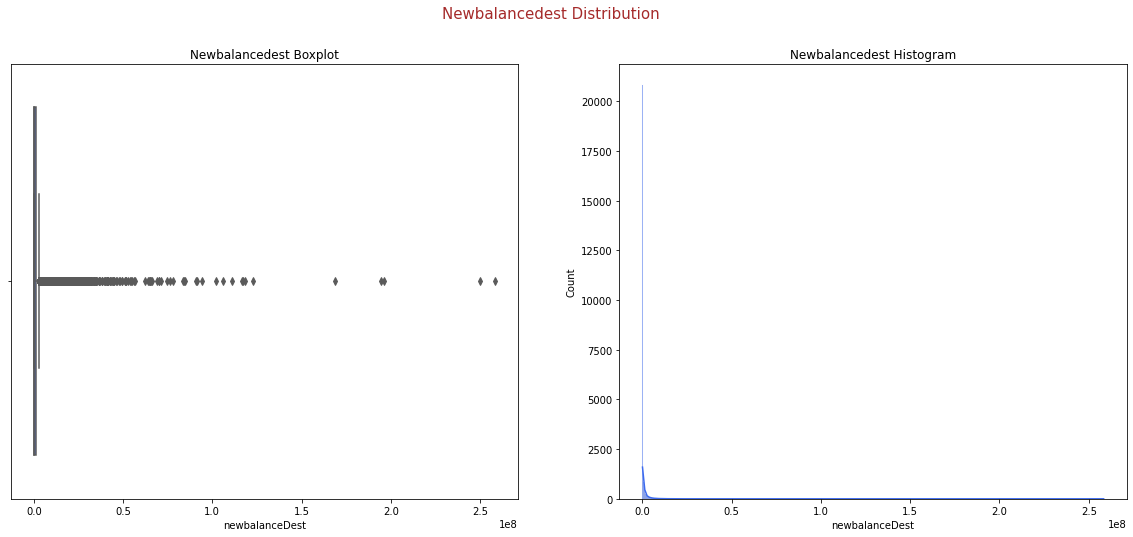

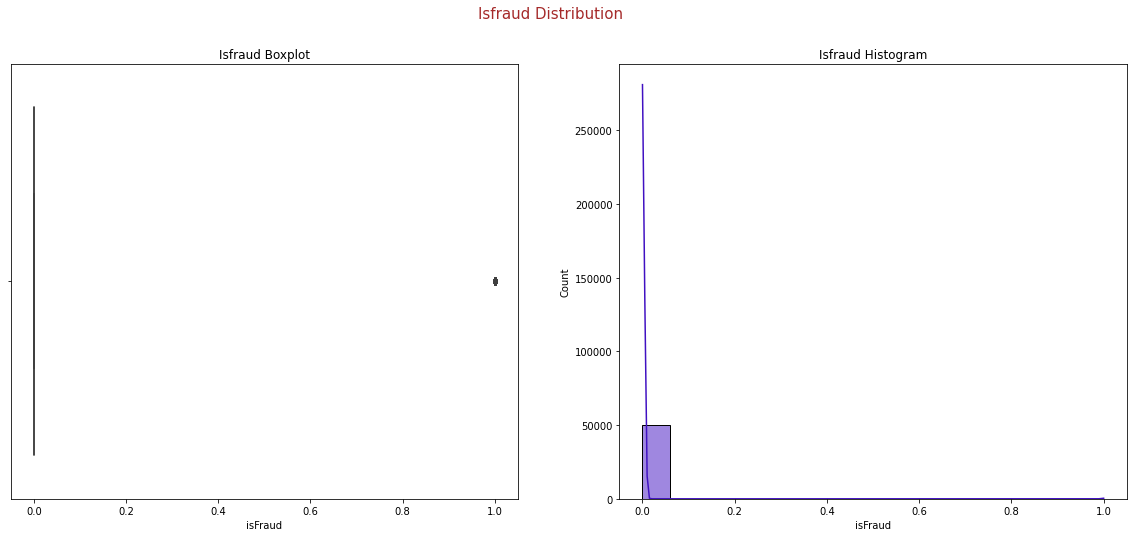

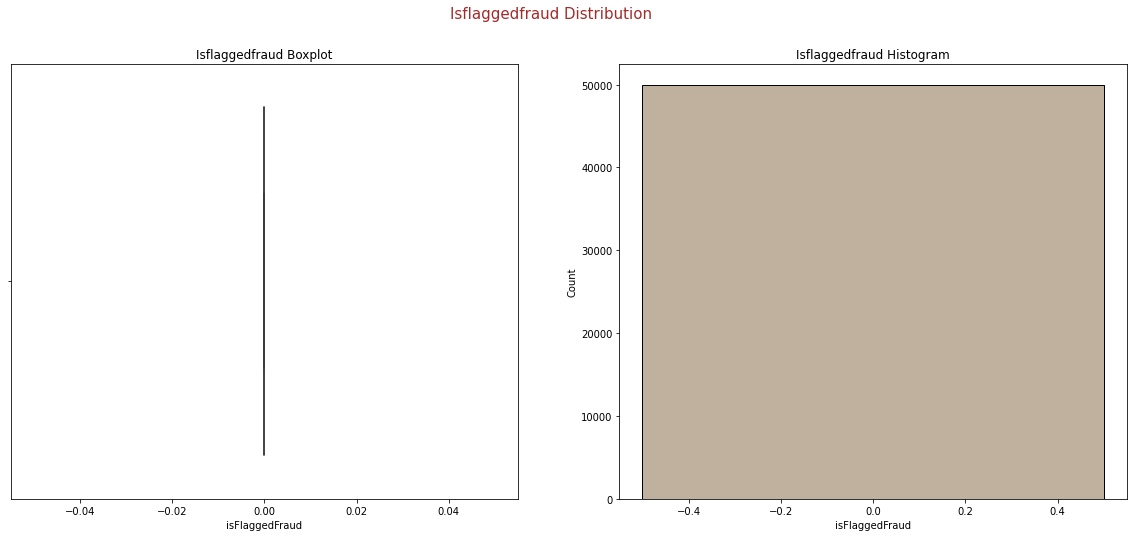

In [68]:
for i in num_cols:
    show_distribution(data.sample(50000), i)

In [69]:
data['diffOrg'] = data['oldbalanceOrg']-data['newbalanceOrig']
data['diffDest'] = data['oldbalanceDest'] - data['newbalanceDest']

In [70]:
data = data.drop(['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'nameOrig', 'nameDest'], axis=1)

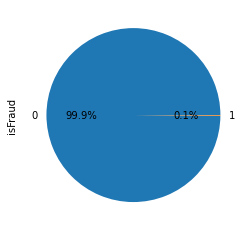

In [71]:
data['isFraud'].value_counts().plot.pie(autopct='%1.1f%%');

## 3.7 Identify the target variables.


In [72]:
##---------Type the code below this line------------------##

data['isFraud']

0          0
1          0
2          1
3          1
4          0
          ..
6362615    1
6362616    1
6362617    1
6362618    1
6362619    1
Name: isFraud, Length: 6362620, dtype: int64

In [73]:
data['isFraud'].value_counts(normalize=True)

0    0.998709
1    0.001291
Name: isFraud, dtype: float64

## 3.8 Separate the data front the target such that the dataset is in the form of (X,y) or (Features, Label)


In [74]:
##---------Type the code below this line------------------##

train_data, test_data = train_test_split(data, test_size=0.3, random_state=42)
print(f'Train data shape : {train_data.shape}') 
print(f'Test data shape : {test_data.shape}')

Train data shape : (4453834, 7)
Test data shape : (1908786, 7)


In [75]:
x = train_data.drop('isFraud', axis=1)
y = train_data['isFraud']

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.25, random_state=42)

## 3.9 Discretize the target variable or perform one-hot encoding on the target or any other as and if required.


In [76]:
##---------Type the code below this line------------------##
x_train.sample(8)

,step,type,amount,isFlaggedFraud,diffOrg,diffDest
320104,16,CASH_OUT,65574.42,0,0.00,-260922.48
4948587,351,TRANSFER,755539.99,0,10504.00,-755539.99
6212607,588,PAYMENT,11817.61,0,11817.61,0.00
1957407,178,CASH_IN,38687.77,0,-38687.77,38687.76
3679988,276,CASH_OUT,204768.52,0,1546.00,-204768.52
5772193,400,CASH_OUT,250426.77,0,113097.80,-410580.56
621445,34,PAYMENT,13157.76,0,0.00,0.00
675963,36,CASH_OUT,176244.00,0,13948.00,-176244.00


In [77]:
le = LabelEncoder()
x_train['type'] = le.fit_transform(x_train['type'])
x_valid['type'] = le.transform(x_valid['type'])

x_train.sample(4)

,step,type,amount,isFlaggedFraud,diffOrg,diffDest
3118259,236,0,5377.53,0,-5377.53,5377.53
1312372,136,4,1452194.98,0,15005.00,-1452194.99
426535,18,0,118879.75,0,-118879.76,118879.76
3518267,259,1,90984.26,0,11597.00,-90984.26


In [78]:
rs = RobustScaler()
x_train = rs.fit_transform(x_train)
x_valid = rs.transform(x_valid)

In [79]:
x_train[12]

array([-3.07262570e-01,  1.50000000e+00,  1.08382566e-03,  0.00000000e+00,
        0.00000000e+00, -5.04236990e-01])

In [80]:
# Let's apply SMOTE (over sampling technique) to make data balance
sm = SMOTE(random_state=2)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train)

In [81]:
x_train_res.shape

(6672114, 6)

# 6. Implement Machine Learning Techniques

In [82]:
##---------Type the code below this line------------------##

# we will be using a sequential model which is a cnn 

model = Sequential([
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


## 6.1 ML technique 1

In [83]:
##---------Type the code below this line------------------##
"""Random forest classifier
Decision tree classifier
Neural Network
kmeans clustering or DBScan
Any ML technique"""

# using Neural network
model.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')
#model.summary()

In [84]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')

## 7. Conclude 

### 7.1 Comment on the performance of the ML techniques used.

plot accuracy or any other performance metric of the ML algo.


--------------Type the answers below this line--------------

In [85]:
test_data.sample(6)

,step,type,amount,isFraud,isFlaggedFraud,diffOrg,diffDest
76741,10,PAYMENT,6672.61,0,0,6672.61,0.00
4797449,345,TRANSFER,344466.21,0,0,131.00,-344466.21
5127410,356,CASH_OUT,140558.94,0,0,0.00,-140558.94
825747,41,CASH_IN,1180.37,0,0,-1180.37,1180.37
1265977,135,CASH_IN,801.51,0,0,-801.50,801.50
2879468,228,CASH_OUT,93009.45,0,0,32013.00,-93009.46


In [86]:
x_test = test_data.drop('isFraud', axis=1)
y_test = test_data['isFraud']

x_test['type'] = le.transform(x_test['type'])
x_test = rs.transform(x_test)

In [87]:
x_test[12]


array([-0.15642458,  0.        ,  0.40238825,  0.        ,  2.01773749,
       -1.02966379])

In [88]:
model.evaluate(x_valid, y_valid)

34796/34796 [==============================] - 70s 2ms/step - loss: 0.7710 - accuracy: 0.1475


[0.7709522247314453, 0.14751778542995453]

In [89]:
#model.evaluate(x_test, y_test)

# reducing epochs and steps per epoch to build a poc

In [92]:
callbacks = tf.keras.callbacks.EarlyStopping(patience=4, monitor='val_loss', mode='min')
history = model.fit(x_train_res, y_train_res, epochs=1, steps_per_epoch=994, validation_data=(x_valid, y_valid), callbacks=[callbacks])

994/994 [==============================] - 87s 87ms/step - loss: 0.0519 - accuracy: 0.9796 - val_loss: 0.0638 - val_accuracy: 0.9664


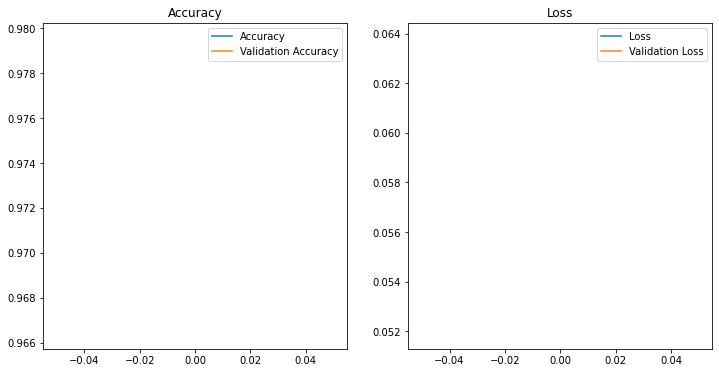

In [93]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(12,6))
plt.subplot(121)
plt.plot(range(len(acc)), acc, label='Accuracy');
plt.plot(range(len(acc)), val_acc, label='Validation Accuracy');
plt.title('Accuracy')
plt.legend();

plt.subplot(122)
plt.plot(range(len(loss)), loss, label='Loss');
plt.plot(range(len(loss)), val_loss, label='Validation Loss');
plt.title('Loss')
plt.legend();


In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred[:5]


In [ ]:
y_pred[y_pred==1]

In [ ]:
y_pred.shape

In [ ]:
y_pred[10]

In [ ]:
print(classification_report(y_test, y_pred.astype('int')))

# conclusion

we see that the model might overfit. we need to iterate on our hyperparameters and dense layers.